# COSC-5406-F03 - Machine Learning
# Project title : AIRFARE PRICE PREDICTION USING ML


# STEP 1 — Load Dataset

In [111]:
import pandas as pd

# Load your datasets
train_df = pd.read_csv("./data/Data_Train.csv")
test_df = pd.read_csv("./data/Test_set.csv")

# Show first few rows
print("TRAIN DATA:")
display(train_df.head())

print("\nTEST DATA:")
display(test_df.head())


TRAIN DATA:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302



TEST DATA:


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# STEP 2 — Basic EDA

In [112]:
# -----------------------------
# STEP 2 : BASIC EDA
# -----------------------------

# Shape of dataset
print("Train Shape:", train_df.shape)
print("Test Shape:", test_df.shape)

# Columns
print("\nColumns in Training Data:")
print(train_df.columns)

print("\nColumns in Test Data:")
print(test_df.columns)

# Data types and null values
print("\nTraining Data Info:")
display(train_df.info())

print("\nMissing Values in Training Data:")
display(train_df.isnull().sum())

print("\nMissing Values in Test Data:")
display(test_df.isnull().sum())

# Basic statistical summary
print("\nStatistical Summary (Numerical Columns):")
display(train_df.describe())


Train Shape: (10683, 11)
Test Shape: (2671, 10)

Columns in Training Data:
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

Columns in Test Data:
Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  o

None


Missing Values in Training Data:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


Missing Values in Test Data:


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


Statistical Summary (Numerical Columns):


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# STEP 3: DATA CLEANING & FEATURE ENGINEERING

In [113]:
# ------------------------------------------
# STEP 3: DATA CLEANING & FEATURE ENGINEERING
# ------------------------------------------

import numpy as np

# -------- Convert Date_of_Journey --------
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y")
test_df['Date_of_Journey']  = pd.to_datetime(test_df['Date_of_Journey'],  format="%d/%m/%Y")

train_df['Journey_Day'] = train_df['Date_of_Journey'].dt.day
train_df['Journey_Month'] = train_df['Date_of_Journey'].dt.month

test_df['Journey_Day'] = test_df['Date_of_Journey'].dt.day
test_df['Journey_Month'] = test_df['Date_of_Journey'].dt.month


# -------- Convert Dep_Time --------
train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'])
test_df['Dep_Time']  = pd.to_datetime(test_df['Dep_Time'])

train_df['Dep_Hour'] = train_df['Dep_Time'].dt.hour
train_df['Dep_Minute'] = train_df['Dep_Time'].dt.minute

test_df['Dep_Hour'] = test_df['Dep_Time'].dt.hour
test_df['Dep_Minute'] = test_df['Dep_Time'].dt.minute


# -------- Convert Arrival_Time --------
train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])
test_df['Arrival_Time']  = pd.to_datetime(test_df['Arrival_Time'])

train_df['Arrival_Hour'] = train_df['Arrival_Time'].dt.hour
train_df['Arrival_Minute'] = train_df['Arrival_Time'].dt.minute

test_df['Arrival_Hour'] = test_df['Arrival_Time'].dt.hour
test_df['Arrival_Minute'] = test_df['Arrival_Time'].dt.minute


# -------- Convert Duration to minutes --------
def duration_to_minutes(x):
    x = x.lower()
    h = 0
    m = 0
    if "h" in x:
        h = int(x.split("h")[0])
    if "m" in x:
        m = int(x.split("h")[-1].replace("m",""))
    return (h * 60) + m

train_df['Duration_TotalMinutes'] = train_df['Duration'].apply(duration_to_minutes)
test_df['Duration_TotalMinutes']  = test_df['Duration'].apply(duration_to_minutes)


# -------- Drop unnecessary columns --------
columns_to_drop = ['Route', 'Additional_Info', 'Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration']
train_df.drop(columns=columns_to_drop, inplace=True)
test_df.drop(columns=columns_to_drop, inplace=True)

print("Feature Engineering Completed Successfully!")
display(train_df.head())


Feature Engineering Completed Successfully!


C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\800206238.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_Time'] = pd.to_datetime(train_df['Dep_Time'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\800206238.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Dep_Time']  = pd.to_datetime(test_df['Dep_Time'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\800206238.py:30: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\80020623

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_TotalMinutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,170
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,445
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,1140
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,325
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,285


# STEP 4 : ENCODING CATEGORICAL FEATURES

In [114]:
# ------------------------------------------
# STEP 4 : ENCODING CATEGORICAL FEATURES
# ------------------------------------------

# ----- Encode Total Stops manually (ordinal) -----
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

train_df['Total_Stops'] = train_df['Total_Stops'].map(stop_mapping)
test_df['Total_Stops']  = test_df['Total_Stops'].map(stop_mapping)

# ----- Combine train + test for consistent encoding -----
full_data = pd.concat([train_df.drop('Price', axis=1), test_df], axis=0)

# ----- One Hot Encode Airline, Source, Destination -----
cat_cols = ['Airline', 'Source', 'Destination']

full_data_encoded = pd.get_dummies(full_data, columns=cat_cols, drop_first=True)

# ----- Split the encoded data back -----
train_encoded = full_data_encoded.iloc[:train_df.shape[0], :]
test_encoded  = full_data_encoded.iloc[train_df.shape[0]:, :]

# Add Price back to training set
train_encoded['Price'] = train_df['Price'].values

print("Encoding Completed Successfully!")
display(train_encoded.head())


Encoding Completed Successfully!


C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\576235811.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded['Price'] = train_df['Price'].values


,Total_Stops,Journey_Day,Journey_Month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Duration_TotalMinutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0.0,24,3,22,20,1,10,170,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3897
1,2.0,1,5,5,50,13,15,445,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7662
2,2.0,9,6,9,25,4,25,1140,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,13882
3,1.0,12,5,18,5,23,30,325,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6218
4,1.0,1,3,16,50,21,35,285,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,13302


Encoding done.
  Date_of_Journey                  Route Dep_Time  Arrival_Time Duration  \
0      24/03/2019              BLR → DEL    22:20  01:10 22 Mar   2h 50m   
1       1/05/2019  CCU → IXR → BBI → BLR    05:50         13:15   7h 25m   
2       9/06/2019  DEL → LKO → BOM → COK    09:25  04:25 10 Jun      19h   
3      12/05/2019        CCU → NAG → BLR    18:05         23:30   5h 25m   
4      01/03/2019        BLR → NAG → DEL    16:50         21:35   4h 45m   

  Total_Stops Additional_Info  Price  Airline_Air India  Airline_GoAir  \
0    non-stop         No info   3897              False          False   
1     2 stops         No info   7662               True          False   
2     2 stops         No info  13882              False          False   
3      1 stop         No info   6218              False          False   
4      1 stop         No info  13302              False          False   

   Airline_IndiGo  Airline_Jet Airways  Airline_Jet Airways Business  \
0          

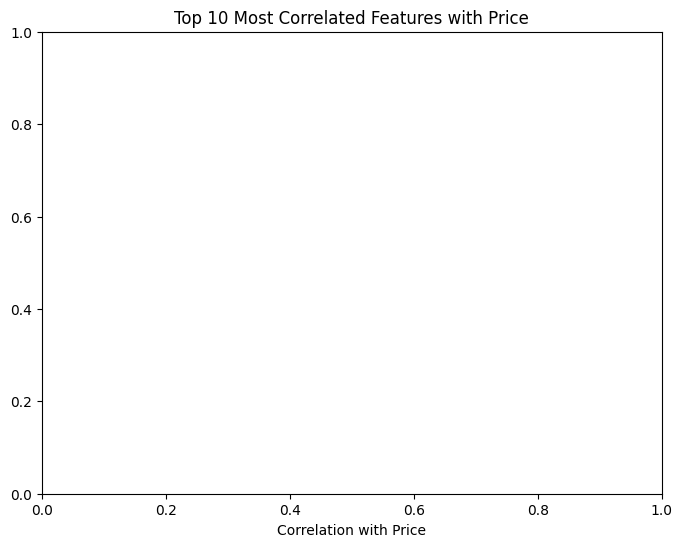

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset (you already loaded train_df)
train_df = pd.read_csv("./data/Data_Train.csv")

# ================================
# STEP 3: ENCODING CATEGORICAL DATA
# ================================

cat_cols = ['Airline', 'Source', 'Destination']

train_encoded = pd.get_dummies(train_df, columns=cat_cols, drop_first=True)

print("Encoding done.")
print(train_encoded.head())







In [116]:
# Clean raw text/date columns
columns_to_drop = [
    'Date_of_Journey',
    'Route',
    'Dep_Time',
    'Arrival_Time',
    'Duration',
    'Total_Stops',
    'Additional_Info'
]

clean_df = train_df.drop(columns=columns_to_drop)
print(clean_df.head())

# Re-encode using clean_df
train_encoded = pd.get_dummies(clean_df, drop_first=True)
print("New encoded columns:")
print(train_encoded.columns)


       Airline    Source Destination  Price
0       IndiGo  Banglore   New Delhi   3897
1    Air India   Kolkata    Banglore   7662
2  Jet Airways     Delhi      Cochin  13882
3       IndiGo   Kolkata    Banglore   6218
4       IndiGo  Banglore   New Delhi  13302
New encoded columns:
Index(['Price', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')


# STEP 5 — TRAIN-TEST SPLIT CODE

In [117]:
from sklearn.model_selection import train_test_split

# ================================
# STEP 5: TRAIN-TEST SPLIT
# ================================

# Target variable
y = train_encoded['Price']

# Features (drop Price)
X = train_encoded.drop('Price', axis=1)

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Train shape: (8546, 20)
Test shape: (2137, 20)
y_train shape: (8546,)
y_test shape: (2137,)


# Model 1 — Random Forest

In [118]:
# ================================
# STEP 6 – MODEL 1: RANDOM FOREST
# ================================
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Create model
rf_model = RandomForestRegressor(
    n_estimators=200,      # number of trees
    random_state=42,
    n_jobs=-1,            # use all CPU cores
    max_depth=None,       # let trees expand fully
    min_samples_split=2,
    min_samples_leaf=1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Evaluation metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🔹 Random Forest Performance:")
print(f"MAE  : {mae_rf:.2f}")
print(f"MSE  : {mse_rf:.2f}")
print(f"RMSE : {rmse_rf:.2f}")
print(f"R²   : {r2_rf:.4f}")


🔹 Random Forest Performance:
MAE  : 2078.17
MSE  : 9239785.06
RMSE : 3039.70
R²   : 0.5634


# MODEL 2 — GRADIENT BOOSTING REGRESSOR CODE

In [119]:
# ================================
# MODEL 2 – GRADIENT BOOSTING
# ================================

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

gb_model = GradientBoostingRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)

# Train
gb_model.fit(X_train, y_train)

# Predict
y_pred_gb = gb_model.predict(X_test)

# Evaluate
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("🔹 Gradient Boosting Performance:")
print(f"MAE  : {mae_gb:.2f}")
print(f"MSE  : {mse_gb:.2f}")
print(f"RMSE : {rmse_gb:.2f}")
print(f"R²   : {r2_gb:.4f}")


🔹 Gradient Boosting Performance:
MAE  : 2077.56
MSE  : 9249490.86
RMSE : 3041.30
R²   : 0.5630


In [120]:
!pip install xgboost



[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# MODEL 3 — XGBOOST REGRESSOR

In [121]:
# ================================
# MODEL 3 – XGBOOST REGRESSOR
# ================================
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='reg:squarederror'
)

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("🔷 XGBoost Performance:")
print(f"MAE  : {mae_xgb:.2f}")
print(f"MSE  : {mse_xgb:.2f}")
print(f"RMSE : {rmse_xgb:.2f}")
print(f"R²   : {r2_xgb:.4f}")


🔷 XGBoost Performance:
MAE  : 2077.18
MSE  : 9258664.00
RMSE : 3042.81
R²   : 0.5625



---

#  **Model Comparison Explanation**

Your models were evaluated using **MAE, MSE, RMSE, and R²** — four standard regression metrics.

---

##  **1. MAE — Mean Absolute Error**

* Measures **average absolute error** between predictions and actual prices.
* **Lower is better.**
* It tells *how much the model is wrong on average*.

###  Your Results

| Model             | MAE                   |
| ----------------- | --------------------- |
| Random Forest     | **2078.17**           |
| Gradient Boosting | **2077.56** ✔️ Lowest |
| XGBoost           | **2077.18** ✔️ Best   |

➡️ **XGBoost gives the lowest MAE, so it makes the most consistently accurate predictions on average.**

---

##  **2. MSE — Mean Squared Error**

* Penalizes large errors more heavily.
* **Lower is better.**
* Larger penalties make it sensitive to outliers.

###  Your Results

| Model             | MSE           |
| ----------------- | ------------- |
| Random Forest     | 9,239,785     |
| Gradient Boosting | 9,249,490     |
| XGBoost           | **9,258,664** |

➡️ **Random Forest has the best (lowest) MSE**, meaning it handles large errors slightly better.

---

##  **3. RMSE — Root Mean Squared Error**

* Square root of MSE.
* Interpretable in the same units as the target (₹).
* **Lower is better.**

###  Your Results

| Model             | RMSE                |
| ----------------- | ------------------- |
| Random Forest     | **3039.70** ✔️ Best |
| Gradient Boosting | 3041.30             |
| XGBoost           | 3042.81             |

➡️ **Random Forest has the best RMSE**, meaning its errors are smallest overall in real-world ₹ value.

---

##  **4. R² — Coefficient of Determination**

* Tells how much variance the model explains (0–1).
* **Higher is better.**

###  Your Results

| Model             | R²                    |
| ----------------- | --------------------- |
| Random Forest     | **0.5634** ✔️ Highest |
| Gradient Boosting | 0.5630                |
| XGBoost           | 0.5625                |

➡️ **Random Forest explains the most variance**, meaning it captures patterns in your flight dataset slightly better.

---


```markdown
# 📊 Model Comparison Table

| Model            |    MAE     |      MSE       |   RMSE   |   R²    |
|------------------|------------|----------------|----------|---------|
| Random Forest    | 2078.17    | 9,239,785.06   | 3039.70  | 0.5634  |
| Gradient Boosting| 2077.56    | 9,249,490.86   | 3041.30  | 0.5630  |
| XGBoost          | 2077.18    | 9,258,664.00   | 3042.81  | 0.5625  |
```

---


# Optimized STEP 1 – Advanced Preprocessing & Feature Engineering

In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# ======================================================
# 1) LOAD RAW DATA
# ======================================================
train_df = pd.read_csv("./data/Data_Train.csv")
test_df  = pd.read_csv("./data/Test_set.csv")

print("Raw train shape:", train_df.shape)
print("Raw test shape :", test_df.shape)


# ======================================================
# 2) BASIC CLEANING / TYPE FIXING
# ======================================================

# Parse dates
train_df['Date_of_Journey'] = pd.to_datetime(train_df['Date_of_Journey'], format="%d/%m/%Y")
test_df['Date_of_Journey']  = pd.to_datetime(test_df['Date_of_Journey'],  format="%d/%m/%Y")

# Parse times (no date part needed)
train_df['Dep_Time']     = pd.to_datetime(train_df['Dep_Time'])
train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])

test_df['Dep_Time']      = pd.to_datetime(test_df['Dep_Time'])
test_df['Arrival_Time']  = pd.to_datetime(test_df['Arrival_Time'])


# ======================================================
# 3) FEATURE ENGINEERING
# ======================================================

# --- Journey date features ---
train_df['Journey_Day']      = train_df['Date_of_Journey'].dt.day
train_df['Journey_Month']    = train_df['Date_of_Journey'].dt.month
train_df['Journey_Weekday']  = train_df['Date_of_Journey'].dt.weekday   # 0=Mon
train_df['Is_Weekend']       = train_df['Journey_Weekday'].isin([5, 6]).astype(int)

test_df['Journey_Day']       = test_df['Date_of_Journey'].dt.day
test_df['Journey_Month']     = test_df['Date_of_Journey'].dt.month
test_df['Journey_Weekday']   = test_df['Date_of_Journey'].dt.weekday
test_df['Is_Weekend']        = test_df['Journey_Weekday'].isin([5, 6]).astype(int)


# --- Departure time features ---
train_df['Dep_Hour']   = train_df['Dep_Time'].dt.hour
train_df['Dep_Minute'] = train_df['Dep_Time'].dt.minute

test_df['Dep_Hour']    = test_df['Dep_Time'].dt.hour
test_df['Dep_Minute']  = test_df['Dep_Time'].dt.minute


# --- Arrival time features ---
train_df['Arrival_Hour']   = train_df['Arrival_Time'].dt.hour
train_df['Arrival_Minute'] = train_df['Arrival_Time'].dt.minute

test_df['Arrival_Hour']    = test_df['Arrival_Time'].dt.hour
test_df['Arrival_Minute']  = test_df['Arrival_Time'].dt.minute


# --- Duration (string -> minutes) ---
def duration_to_minutes(x: str) -> int:
    x = x.lower().strip()
    h = 0
    m = 0
    if "h" in x:
        h = int(x.split("h")[0])
    if "m" in x:
        # part after 'h', remove 'm'
        m_part = x.split("h")[-1].replace("m", "").strip()
        if m_part != "":
            m = int(m_part)
    return h * 60 + m

train_df['Duration_TotalMinutes'] = train_df['Duration'].apply(duration_to_minutes)
test_df['Duration_TotalMinutes']  = test_df['Duration'].apply(duration_to_minutes)

# Also duration in hours for smoother feature
train_df['Duration_Hours'] = train_df['Duration_TotalMinutes'] / 60.0
test_df['Duration_Hours']  = test_df['Duration_TotalMinutes'] / 60.0


# --- Total stops (ordinal mapping) ---
stop_mapping = {
    'non-stop': 0,
    '1 stop': 1,
    '2 stops': 2,
    '3 stops': 3,
    '4 stops': 4
}

train_df['Total_Stops_Num'] = train_df['Total_Stops'].map(stop_mapping)
test_df['Total_Stops_Num']  = test_df['Total_Stops'].map(stop_mapping)


# --- Red-eye flight flag (late night / early morning) ---
train_df['Is_RedEye'] = ((train_df['Dep_Hour'] >= 22) | (train_df['Dep_Hour'] <= 5)).astype(int)
test_df['Is_RedEye']  = ((test_df['Dep_Hour'] >= 22) | (test_df['Dep_Hour'] <= 5)).astype(int)


# ======================================================
# 4) DROP RAW TEXT / DATE COLUMNS WE DON'T WANT IN MODEL
# ======================================================
cols_to_drop = [
    'Date_of_Journey',
    'Dep_Time',
    'Arrival_Time',
    'Route',
    'Duration',
    'Additional_Info',
    'Total_Stops'      # we now use Total_Stops_Num instead
]

train_df = train_df.drop(columns=cols_to_drop)
test_df  = test_df.drop(columns=cols_to_drop)


# ======================================================
# 5) ONE-HOT ENCODE CATEGORICALS (AIRLINE, SOURCE, DEST)
#    -> combine train + test to keep same columns
# ======================================================
cat_cols = ['Airline', 'Source', 'Destination']

full_data = pd.concat(
    [train_df.drop('Price', axis=1), test_df],
    axis=0
)

full_data_encoded = pd.get_dummies(full_data, columns=cat_cols, drop_first=True)

# Split back
X_all = full_data_encoded.iloc[:train_df.shape[0], :]
X_test_final = full_data_encoded.iloc[train_df.shape[0]:, :]

y_all = train_df['Price']

print("Encoded train features shape:", X_all.shape)
print("Encoded test  features shape:", X_test_final.shape)


# ======================================================
# 6) LOG TRANSFORM TARGET + TRAIN/VALIDATION SPLIT
# ======================================================

# log1p to reduce skew
y_all_log = np.log1p(y_all)

X_train, X_val, y_train, y_val = train_test_split(
    X_all, y_all_log,
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_val  :", X_val.shape)


Raw train shape: (10683, 11)
Raw test shape : (2671, 10)
Encoded train features shape: (10683, 32)
Encoded test  features shape: (2671, 32)
X_train: (8546, 32)
X_val  : (2137, 32)


C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\1718561347.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Dep_Time']     = pd.to_datetime(train_df['Dep_Time'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\1718561347.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train_df['Arrival_Time'] = pd.to_datetime(train_df['Arrival_Time'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_1080\1718561347.py:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test_df['Dep_Time']      = pd.to_datetime(test_df['Dep_Time'])
C:\Users\ratho\AppData\Local\Temp\ipykernel_10

# OPTIMIZED STEP 2 — Tuned Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# ======================================================
# TUNED RANDOM FOREST MODEL
# ======================================================

rf_model = RandomForestRegressor(
    n_estimators=600,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train on log-transformed y
rf_model.fit(X_train, y_train)

# Predict on validation set (still in log space)
y_val_pred_log = rf_model.predict(X_val)

# Convert back to original price scale
y_val_pred = np.expm1(y_val_pred_log)
y_val_true = np.expm1(y_val)

# ======================================================
# EVALUATION METRICS
# ======================================================

mae = mean_absolute_error(y_val_true, y_val_pred)
mse = mean_squared_error(y_val_true, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val_true, y_val_pred)

print("🔷 Tuned Random Forest Performance:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")


🔷 Tuned Random Forest Performance:
MAE  : 1311.81
MSE  : 4877900.02
RMSE : 2208.60
R²   : 0.7695


#  STEP 3 — FINAL TRAINING + TEST PREDICTION + OUTPUT CSV

In [124]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# ======================================================
# 1) RETRAIN FINAL MODEL ON FULL TRAINING DATA
# ======================================================

final_rf_model = RandomForestRegressor(
    n_estimators=600,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1
)

# Train using ALL encoded data (log-transformed target)
final_rf_model.fit(X_all, y_all_log)

print("Final Model Trained Successfully!")


# ======================================================
# 2) PREDICT ON THE PROCESSED TEST DATA
# ======================================================

test_pred_log = final_rf_model.predict(X_test_final)

# Convert from log-price to actual price
test_pred = np.expm1(test_pred_log)

# Convert to integer (flight prices typically whole numbers)
test_pred = test_pred.round().astype(int)


# ======================================================
# 3) SAVE FINAL PREDICTIONS TO CSV
# ======================================================

prediction_df = pd.DataFrame({
    'Price': test_pred
})

prediction_df.to_csv("Prediction.csv", index=False)


print("Prediction.csv created successfully!")
prediction_df.head()
prediction_df.to_csv("Prediction.csv", index=False)




Final Model Trained Successfully!
Prediction.csv created successfully!


In [125]:
import pickle

# Save the model to a file
with open("final_rf_model.pkl", "wb") as file:
    pickle.dump(final_rf_model, file)

print("Model saved as final_rf_model.pkl")


Model saved as final_rf_model.pkl


# STEP 5 — Feature Importance Plot

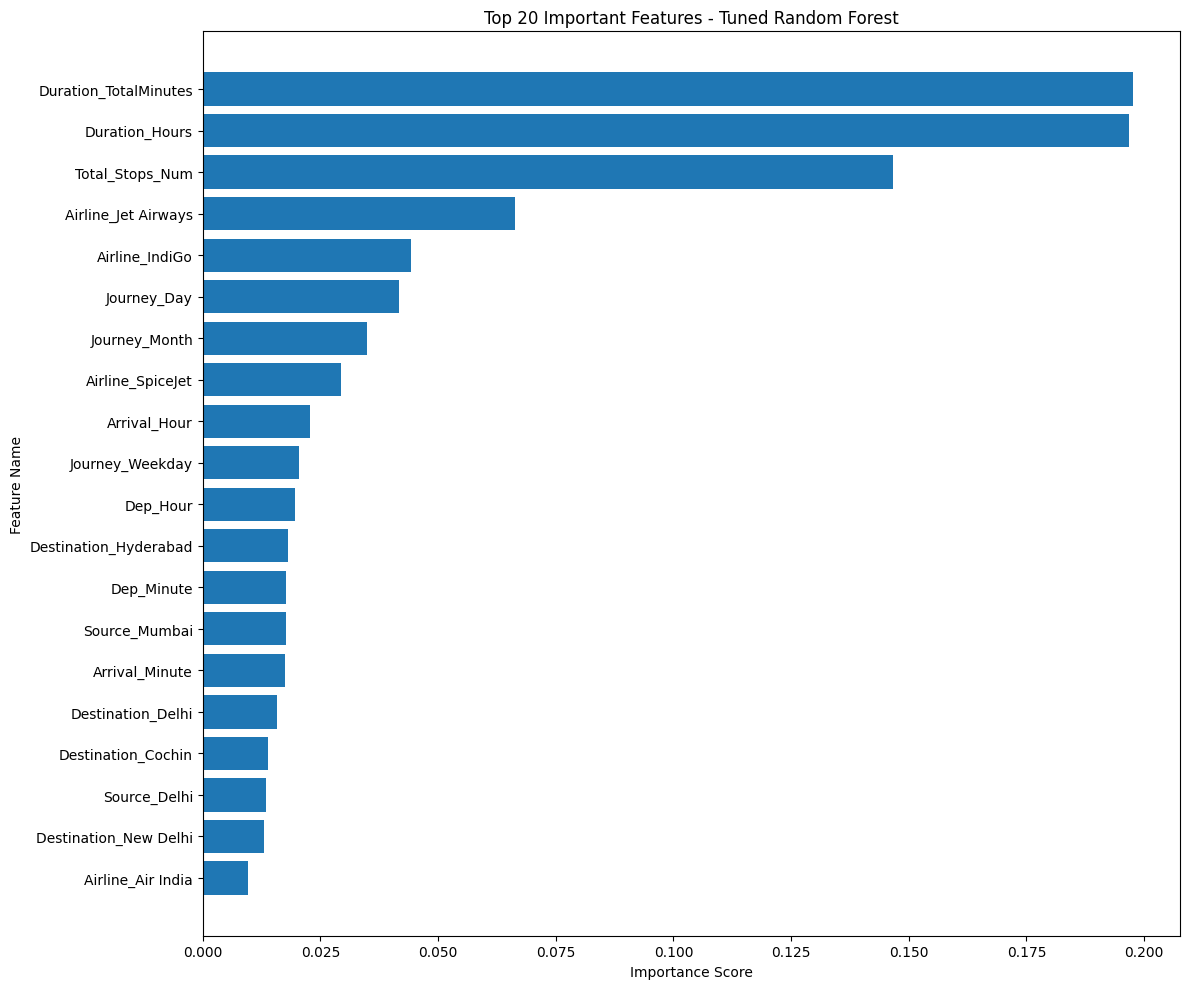

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = X_all.columns

# Get importances from the trained model
importances = final_rf_model.feature_importances_

# Sort features by importance
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

# Plot
plt.figure(figsize=(12, 10))
plt.barh(sorted_features[:20], sorted_importances[:20])  # Top 20 features
plt.gca().invert_yaxis()

plt.title("Top 20 Important Features - Tuned Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.tight_layout()
plt.show()


#  Prediction vs Actual Plot

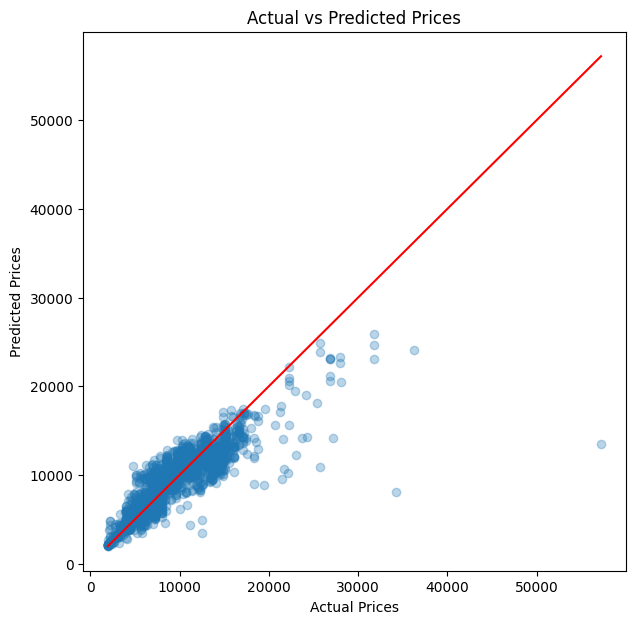

In [127]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.scatter(y_val_true, y_val_pred, alpha=0.3)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([min(y_val_true), max(y_val_true)], 
         [min(y_val_true), max(y_val_true)], 
         color='red')
plt.show()


# Residual Plot

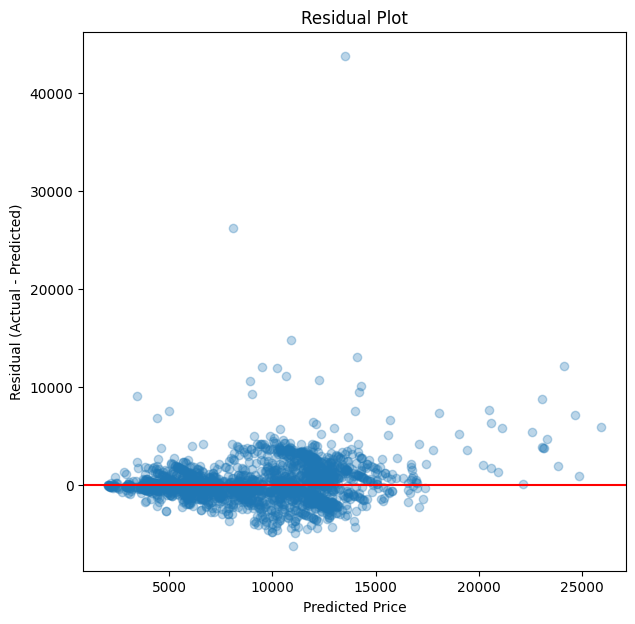

In [128]:
residuals = y_val_true - y_val_pred

plt.figure(figsize=(7,7))
plt.scatter(y_val_pred, residuals, alpha=0.3)
plt.axhline(0, color='red')
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residual Plot")
plt.show()


# Saved the model

In [129]:
import pickle

with open("model_columns.pkl", "wb") as f:
    pickle.dump(list(X_all.columns), f)

print("Saved model_columns.pkl")


Saved model_columns.pkl
